In [1]:
import numpy as np 
import time
import matplotlib.pyplot as plt


1.d)

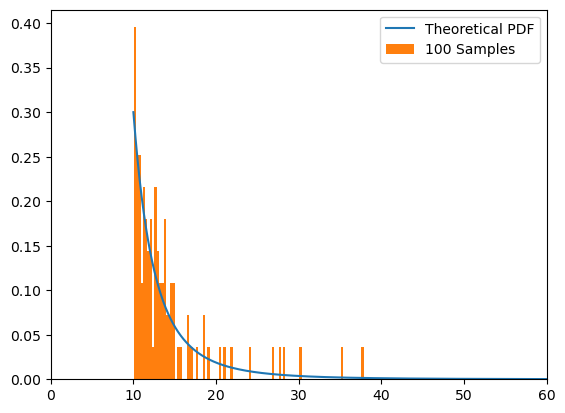

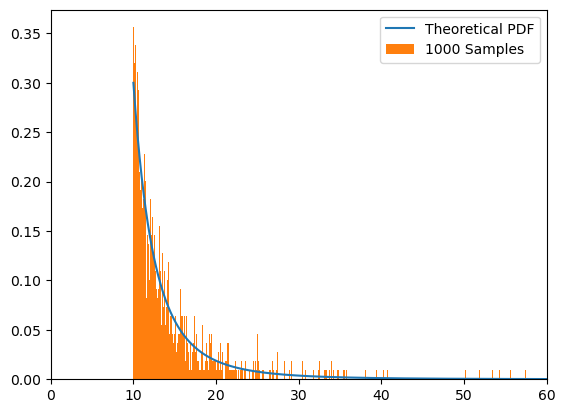

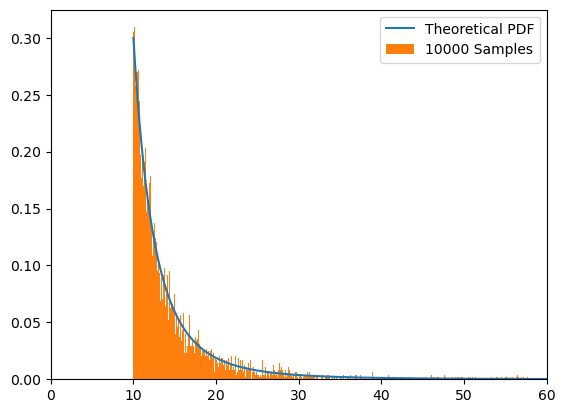

In [12]:
def inv_cdf(x, gamma = 4, x0 = 10):
    return x0*(1-x)**(-1/(gamma-1))

N = [100,1000,10000]
samples = []
for n in N:
    u = np.random.random(n)
    samples.append(inv_cdf(u))

x = np.linspace(10, 60, 1000)
def pdf(x, gamma = 4, x0 = 10):
    return (gamma-1)*x0**(gamma-1)*x**(-gamma)


plt.figure()
plt.plot(x, pdf(x), label="Theoretical PDF")
plt.hist(samples[0], bins= 100, density=True, label="100 Samples")
plt.xlim(0,60)
plt.legend()
plt.show()

plt.figure()
plt.plot(x, pdf(x), label="Theoretical PDF")
plt.hist(samples[1], bins= 1000, density=True, label="1000 Samples")
plt.xlim(0,60)
plt.legend()
plt.show()

plt.figure()
plt.plot(x, pdf(x), label="Theoretical PDF")
plt.hist(samples[2], bins= 10000, density=True, label="10000 Samples")
plt.xlim(0,60)
plt.legend()
plt.show()

2.b)

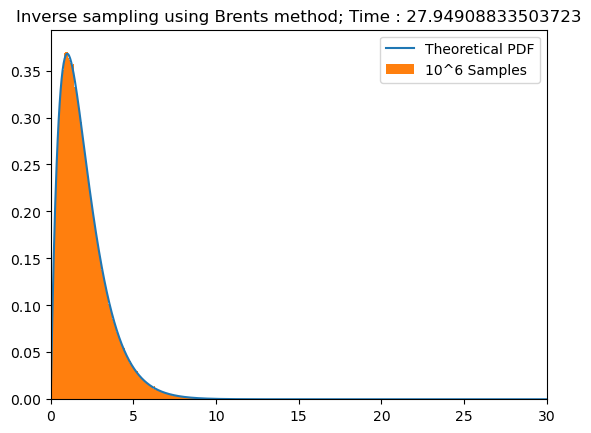

In [23]:
def F(x, u):
    return 1 - np.e**(-x)*(x+1) - u

from scipy.optimize import brentq

samples = []
start = time.time()
for i in range(10**6):
    u = np.random.random()
    root = brentq(F, 0.0, 50.0, args=(u,))
    samples.append(root)

end = time.time()

x = np.linspace(0, 30, 1000)
def f(x):
    return x*np.e**(-x)

plt.figure()
plt.plot(x, f(x), label="Theoretical PDF")
plt.hist(samples, bins= 1000, density=True, label="10^6 Samples")
plt.xlim(0,30)
plt.legend()
plt.title(f"Inverse sampling using Brents method; Time : {end-start}")
plt.show()

2.c)

Accept rate : 0.6798651147612313


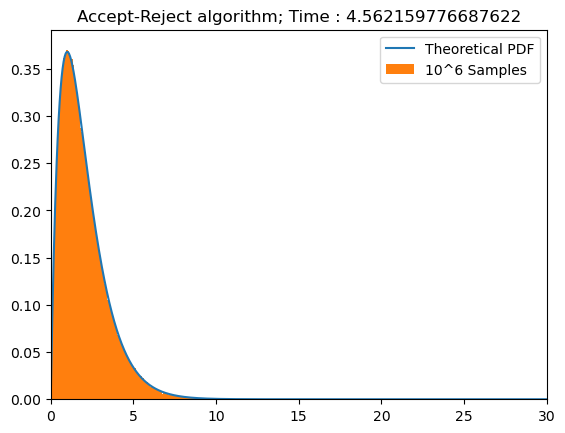

In [28]:
def g(x):
    return np.e**(-x/2)/2

c = 4 / np.e
samples = []

start = time.time()

i = 0
while len(samples) < 10**6:
    u = np.random.random()
    x = np.random.exponential(2)
    if u*c*g(x) <= f(x):
        samples.append(x)
    i += 1

print(f"Accept rate : {10**6/i}")

end = time.time()

x = np.linspace(0, 30, 1000)
def f(x):
    return x*np.e**(-x)

plt.figure()
plt.plot(x, f(x), label="Theoretical PDF")
plt.hist(samples, bins= 1000, density=True, label="10^6 Samples")
plt.xlim(0,30)
plt.legend()
plt.title(f"Accept-Reject algorithm; Time : {end-start}")
plt.show()

2.d)

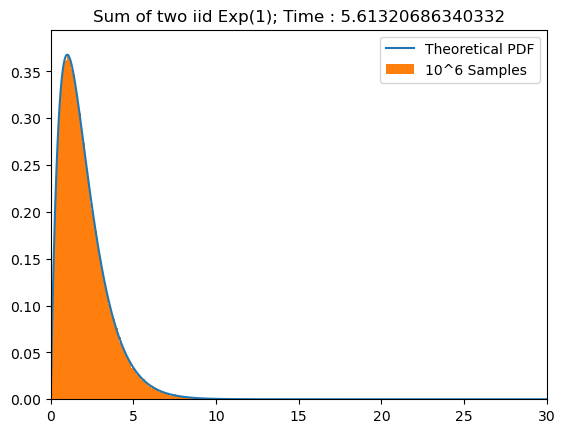

In [26]:
samples = []

start = time.time()

for i in range(10**6):
    y = np.random.exponential(1,2)
    samples.append(np.sum(y))

end = time.time()

x = np.linspace(0, 30, 1000)
def f(x):
    return x*np.e**(-x)

plt.figure()
plt.plot(x, f(x), label="Theoretical PDF")
plt.hist(samples, bins= 1000, density=True, label="10^6 Samples")
plt.xlim(0,30)
plt.legend()
plt.title(f"Sum of two iid Exp(1); Time : {end-start}")
plt.show()